In [ ]:
pip install yfinance pandas numpy matplotlib seaborn scikit-learn


 1. Importing Libraries

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


2. Load Stock Data
We will use Apple stock (AAPL) from Yahoo Finance

In [ ]:
data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


3. Explore the Data

In [ ]:
print(data.head())

Price            Open       High        Low      Close     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  71.627092  72.681289  71.373218  72.620842  135480400
2020-01-03  71.847125  72.676454  71.689965  71.914825  146322800
2020-01-06  71.034709  72.526533  70.783248  72.487846  118387200
2020-01-07  72.497529  72.753823  71.926915  72.146942  108872000
2020-01-08  71.849533  73.609745  71.849533  73.307510  132079200


4. Correlation Analysis (Heatmap)

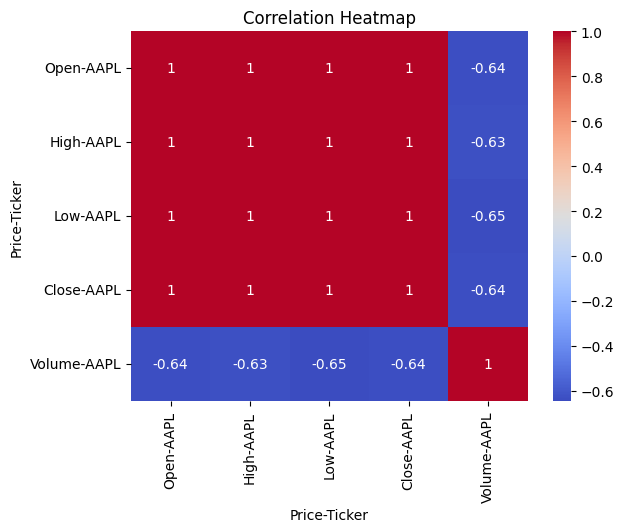

In [ ]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


5. Feature Selection

In [ ]:
X = data[['Open', 'High', 'Low', 'Volume']]  # independent variables
y = data['Close']  # target variable


6. Splitting the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Model Training

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

8. Prediction

In [ ]:
y_pred = model.predict(X_test)


9. Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 1.1321429168327077
R-squared Score: 0.9993541074730083


10. Plot Actual vs Predicted

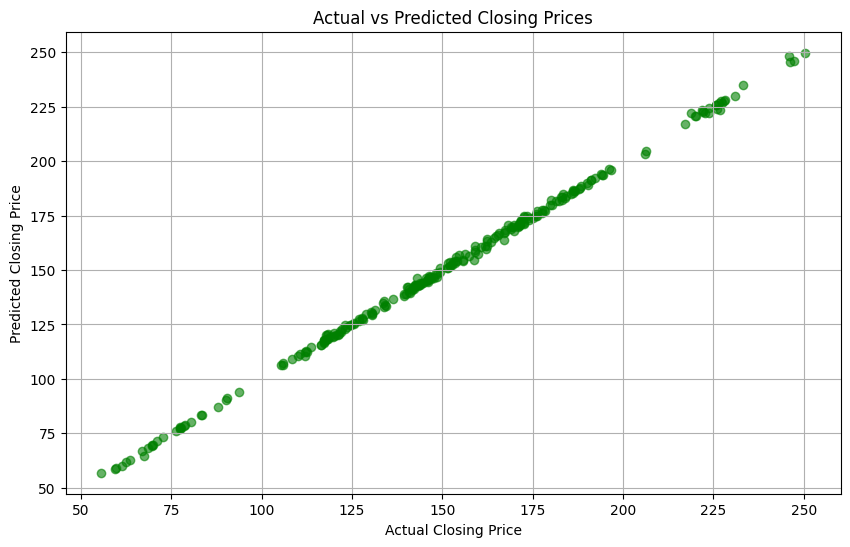

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.grid(True)
plt.show()